## Importing the libraries

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

Dataset has 10 features. Each row corresponds to a Wine brand.

Customer Segment(feature) --> corresponds to a group of customers(clusters) that have similar preferences for similar group of wine

**Recommender System**: predict which customer segement a wine belongs to, so we recommened that wine to that particular customer segment.

### Importing the Dataset

In [ ]:
data = pd.read_csv("Wine.csv")

X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train.shape

(142, 13)

In the **fit_transform** method there is fit and transform.

The **fit** part is used to analyze the data on which we apply the object (getting the eigen values and the eigen vectors of the covariance matrix, etc.) in order to get the required information to apply the PCA
transformation, that is, extracting some top features that explain the most the variance.

Then once the object gets these informations thanks to the fit method, the **transform** part is used to apply the PCA transformation.
And since the test set and the training set have very similar structures, we can directly use the object already
created and fitted to the training set, to transform the test set.


## Applying PCA

In [ ]:
# There are too many features(dimensions) on our dataset, so lets reduce some

from sklearn.decomposition import PCA

k = 2
pca = PCA(n_components=k)
# n_components (principal components) --> no. of features to keep
# start from k=2 --> 2 extracted features (z1,z2) then visualize the new dataaset. If visualization is poor, increase the value of k

# feature scaling and dimensionality reduction --> both must be applied on cross-validation set and test set (only applied on features --> X)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
X_train.shape

(142, 2)

## Explaining Variance of PCA

In [ ]:
components = pca.components_ # representing the directions of maximum variance in the data.
print(components) 

[[ 0.12959991 -0.24464064 -0.01018912 -0.24051579  0.12649451  0.38944115
   0.42757808 -0.30505669  0.30775255 -0.11027186  0.30710508  0.37636185
   0.2811085 ]
 [-0.49807323 -0.23168482 -0.31496874  0.02321825 -0.25841951 -0.1006849
  -0.02097952 -0.0399057  -0.06746036 -0.53087111  0.27161729  0.16071181
  -0.36547344]]


In [ ]:
print(pca.explained_variance_ratio_) # Percentage of variance explained by each of the selected components.

[0.36884109 0.19318394]


In [ ]:
print(pca.singular_values_) # The singular values corresponding to each of the selected components

[26.09369    18.88432045]


## Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Confusion Matrix

Find no. of incorrect predictions and correct predictions

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score 
y_pred = classifier.predict(X_test) # Predict results on new observations

confuse_matrix = confusion_matrix(y_test,y_pred) # compare actual labels (test) with predicted labels
print(confuse_matrix)

accuracy_score(y_test, y_pred)

# confusion matrix of 3 rows and 3 columns --> because we have 3 classes here

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


0.9722222222222222

In [ ]:
# Function to plot confusion matrix using Seaborn's heatmap()

def plot_confusion_matrix(confuse_matrix):
  fig,ax = plt.subplots(figsize=(8,6))

  # Set the font scale
  sns.set(font_scale=1.5)

  ax = sns.heatmap(
      confuse_matrix,
      annot=True, # Annote the boxes
      cbar=False
  )

  plt.ylabel("Predicted label")
  plt.xlabel("True label")

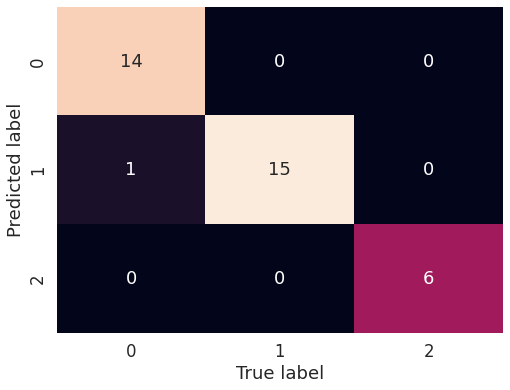

In [ ]:
plot_confusion_matrix(confuse_matrix)

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


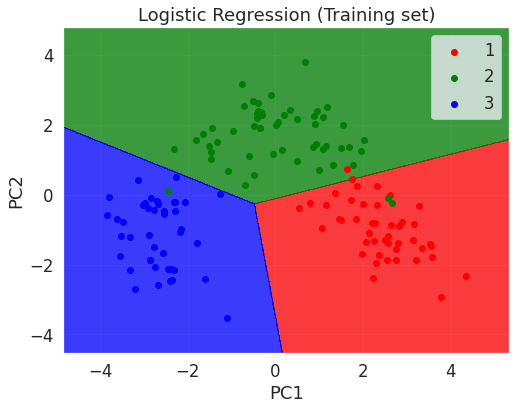

In [ ]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8, 6))

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

PC1 --> z1

PC2 --> z2

contains extracted features of cluster

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


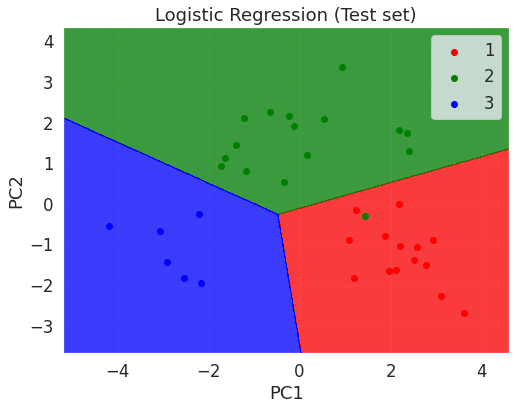

In [ ]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8, 6))

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()